# Testing SXS catalogue load

Objectives:

1. Test SXS simulation waveform loaded through nrc-catalogue-tools.

## Load the library

In [1]:
import sys

#p1 = "/home/vaishakp/Codes/custom_libraries/nr-catalog-tools"
#libpath = '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools'
libpath = '/home/vaishakprasad/Documents/Codes/nr-catalog-tools'

if libpath not in sys.path:
    sys.path.append(libpath)

print(sys.path)

['/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/Documents/Codes/config', '/home/vaishakprasad/Documents/Codes/waveformtools', '/home/vaishakprasad/Documents/Codes/qlmtools', '/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python310.zip', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/lib-dynload', '', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages', '/home/vaishakprasad/Documents/Codes/nr-catalog-tools']


## Display the environment

In [2]:
%%bash
python --version
conda info --envs | grep '*'

Python 3.10.11
nrcat                 *  /home/vaishakprasad/soft/anaconda3/envs/nrcat


# Method I : through nr-catalogue-tools

In [22]:
import nrcatalogtools
import nrcatalogtools.lvc as lalutils
#from nrcatalogtools.lvc import get_lal_mode_dictionary_from_lmax
#from nrcatalogtools.rit import RITCatalog
from nrcatalogtools import utils
from nrcatalogtools.waveform import WaveformModes
import sxs

import numpy as np
from nrcatalogtools.sxs import SXSCatalog
import matplotlib.pyplot as plt


import numpy as np
import waveformtools
import matplotlib.pyplot as plt

#####################
# matplotlib presets
#########################################

labelsize=16
labelpad=14

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"figure.figsize" : (8,6)})
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.labelpad" : labelpad})
plt.rcParams.update({"axes.labelsize" : labelsize})
plt.rcParams.update({"figure.autolayout" : True})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({'legend.markerscale': 12})

In [4]:
def RMSerrs(func1, func2):
    ''' Compute and return the error estimates between two arrays
    
    Parameters
    ----------
    func1, func2 : ndarray
                   Arrays of same shape to compare with.
    info : sphericalarray
           Grid info
    
    Returns
    -------
    RMS : float
          The RMS error
    Amax : float
           The max diff relative to A1max
    Amin : float the min diff relative to A2max
    '''
    A1max = np.amax(np.absolute(func1))

    diff = (func1 - func2)

    Amax = np.amax(diff)/A1max
    Amin = np.amin(diff)/A1max

    RMS = np.sqrt(np.sum(np.absolute(diff)**2)/len(func1))/A1max

    return RMS, Amin, Amax

### SXS cat details

In [5]:
# View SXS cache
sxsdir = sxs.sxs_directory("cache")
sxsdir

PosixPath('/home/vaishakprasad/.cache/sxs')

In [34]:
# Simulation name
sim_name = 'SXS:BBH:0002'

# Parameters
#M = 40
#D = 1000
#inc = 0
#coa_phase = np.pi/4
#delta_t = 1./(4*2048)

# Convention

hp1, hx1, h1... : nrcat waveforms

wfa1, hp2, hx2, ... : waveformtools waveforms

## Load waveform

In [35]:
sxs1 = SXSCatalog.load(download=True)

In [ ]:
sxsw = sxs1.get(sim_name, extrapolation_order=2)

Found the following files to load from the SXS catalog:
    SXS:BBH:0002v7/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/166211179 [00:00<?, ?it/s]

In [33]:
help(sxs1.get)

Help on method get in module nrcatalogtools.sxs:

get(sim_name, extrapolation_order=2) method of nrcatalogtools.sxs.SXSCatalog instance



In [31]:
sxs1.get_metadata(sim_name)

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/metadata.json


Metadata([('simulation_name', 'd18.0_q1.0_s0_0_0_s0_0_0/Lev5'),
          ('alternative_names', 'SXS:BBH:0001'),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 28.1190834141),
          ('reference_mass_ratio', 0.9999999899440033),
          ('reference_chi_eff', 1.2156391861217613e-07),
          ('reference_chi1_perp', 9.733308972643856e-10),
          ('reference_chi2_perp', 1.4299394525915949e-09),
          ('reference_eccentricity', 0.0002569),
          ('reference_dimensionless_spin1',
           [7.09752141352e-10, -6.66051760901e-10, 1.20930921804e-07]),
          ('reference_dimensionless_spin2',
           [5.84453420303e-10, 1.30504445113e-09, 1.22196915414e-07]),
          ('reference_orbital_frequency',
           [2.82808523611e-13, -8.25159171205e-13, 0.0122754056311]),
          ('reference_mass1', 0.500000161328),
          ('reference_mass2', 0.500000166356),
          ('reference_time', 320.0),
      

In [10]:
from waveformtools.waveforms import modes_array
from waveformtools.waveformtools import interp_resam_wfs, xtract_camp_phase

In [32]:
######################################
# Load thru nrcat tools
######################################

wf1_22 = sxsw.get_mode(2, 2)[:, 1]
wf1_t22 = sxsw.get_mode(2, 2)[:, 0]
wf1_p22 = sxsw.get_mode(2, 2)[:, 1]
wf1_x22 = sxsw.get_mode(2, 2)[:, 2]

wf1_22 = wf1_p22 + 1j*wf1_x22


# Recenter the axis of td waveform about max amp
mloc = np.argmax(np.absolute(wf1_22))
mtime = wf1_t22[mloc]
print(mtime)



#############################
# Load via waveformtools
##############################

fdir = "/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v6/Lev5/"
fname = 'rhOverM_Asymptotic_GeometricUnits_CoM.h5'



wf2 = modes_array(label='sxs_001', spin_weight=-2)
wf2.file_name = fname
wf2.data_dir = fdir
wf2.load_modes(ftype='SpEC', var_type='strain', ell_max='auto', resam_type='auto', extrap_order=2)
wf2.get_metadata()

wf2_22 = wf2.mode(2, 2)

##############################
# Construct common time axis
##############################


taxis1 = wf1_t22 - mtime
taxis2 = wf2.time_axis

t1 = max(taxis1[0], taxis2[0])
t2 = min(taxis1[-1], taxis2[-1])

taxis = np.arange(t1, t2, wf2.delta_t())
ell_max = 2 #wf2.ell_max

######################################################

9530.15514714096
Passing /home/vaishakprasad/.cache/sxs/SXS:BBH:0001v6/Lev5/ rhOverM_Asymptotic_GeometricUnits_CoM.h5


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v6/Lev5//rhOverM_Asymptotic_GeometricUnits_CoM.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [15]:
len(taxis)

20041

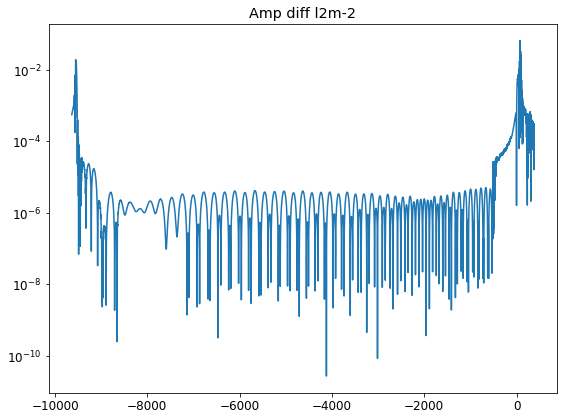

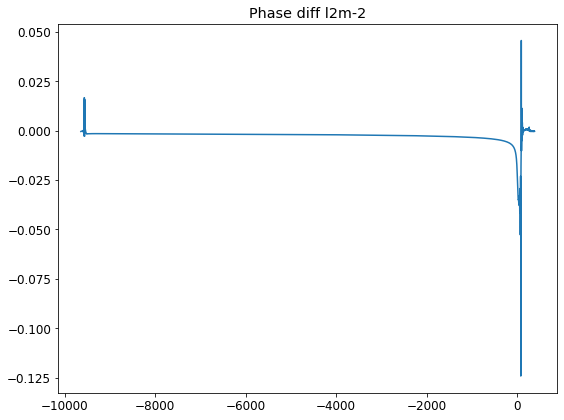

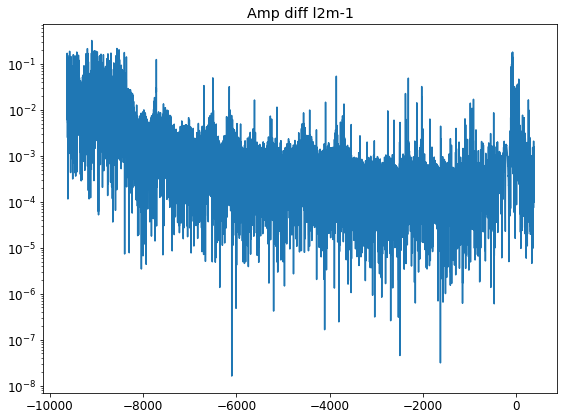

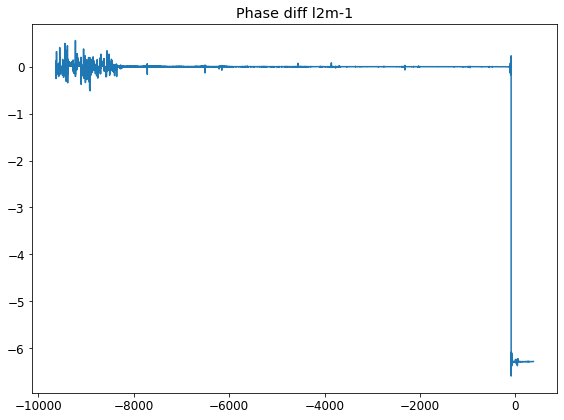

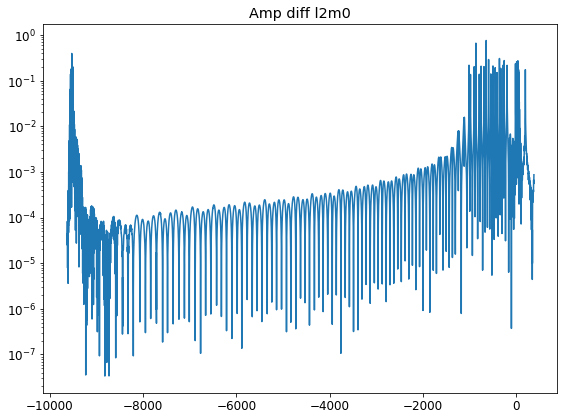

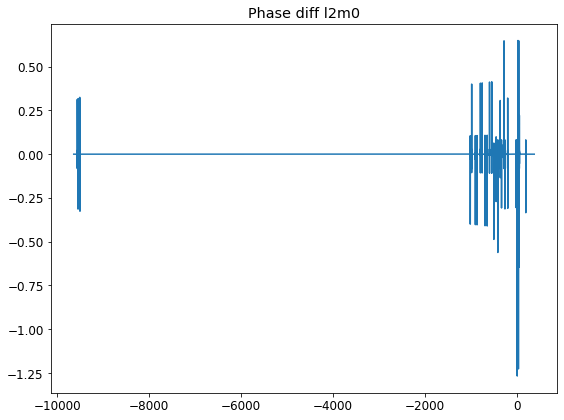

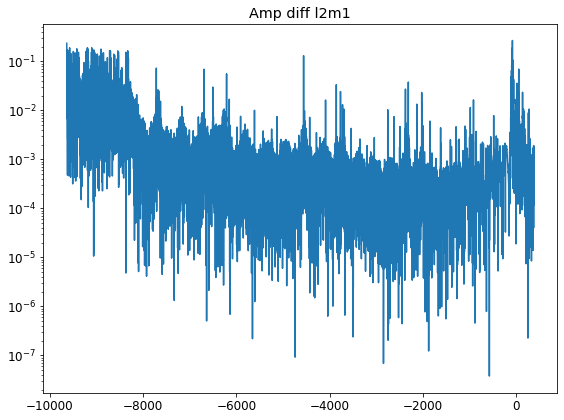

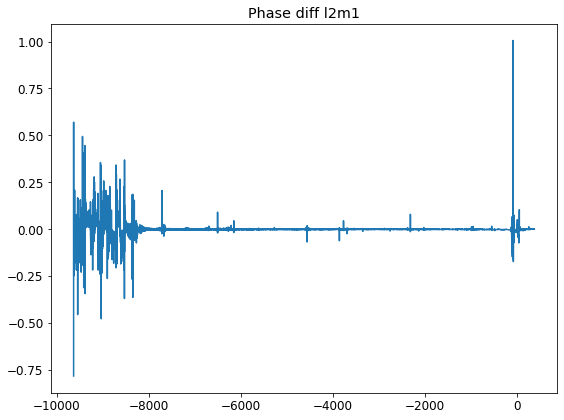

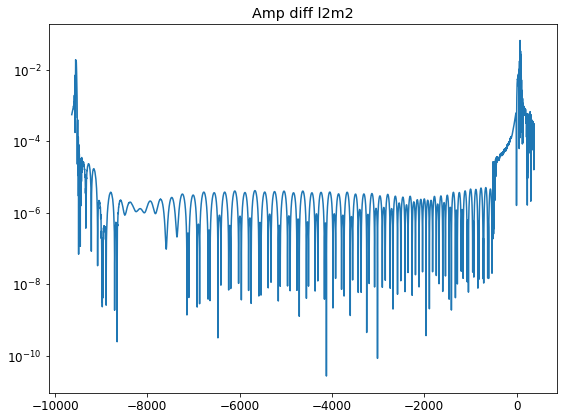

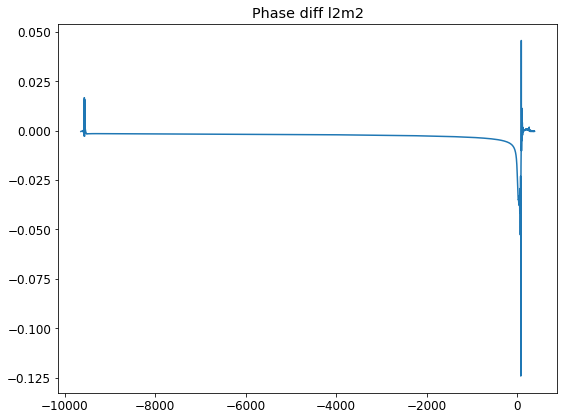

In [23]:
####################
# Compare mode wise
####################

errs = {}

aerrs = []
perrs = []

for ell in range(2, ell_max+1):
    for emm in range(-ell, ell+1):
        
        wf1_tlm = sxsw.get_mode(ell, emm)[:, 0] - mtime
        
        if not (wf1_tlm-taxis1==0).all():
            
            print(wf1_tlm - taxis1)
            raise ValueError('Time axis is different across modes!')
            
        # nrcat   
        wf1_plm = sxsw.get_mode(ell, emm)[:, 1]
        wf1_xlm = sxsw.get_mode(ell, emm)[:, 2]

        wf1_lm = wf1_plm + 1j * wf1_xlm
        wf2_lm = wf2.mode(ell, emm)
        
        wf1_Alm, wf1_Plm = xtract_camp_phase(wf1_lm.real, wf1_lm.imag)
        wf2_Alm, wf2_Plm = xtract_camp_phase(wf2_lm.real, wf2_lm.imag)
        
        
        wf1_rAlm = interp_resam_wfs(wf1_Alm, taxis1, taxis, resam_kind='cubic')
        wf2_rAlm = interp_resam_wfs(wf2_Alm, taxis2, taxis, resam_kind='cubic')
        
        wf1_rPlm = interp_resam_wfs(wf1_Plm, taxis1, taxis, resam_kind='cubic')
        wf2_rPlm = interp_resam_wfs(wf2_Plm, taxis2, taxis, resam_kind='cubic')
        
        if np.argmax(wf1_rAlm)!=np.argmax(wf2_rAlm):
            raise ValueError('Time axes are not centered!')
            
        #print(wf1_phase_lm, wf2_phase_lm)
        # Difference
        
        dAmp_frac = (wf1_rAlm - wf2_rAlm)/wf2_rAlm
            
        if np.mean(np.diff(wf1_rPlm))<0:
            wf1_rPlm = -wf1_rPlm
            
        if np.mean(np.diff(wf2_rPlm))<0:
            wf2_rPlm = -wf2_rPlm
            
        #sign1 = abs(wf1_phase_lm[-1])/wf1_phase_lm[-1]
        #sign2 = abs(wf2_phase_lm[-1])/wf2_phase_lm[-1]
        
        dphase = wf1_rPlm - wf2_rPlm
        
        res_amp, _, _ = RMSerrs(wf1_rAlm, wf2_rAlm)
        
        res_phase, _, _ = RMSerrs(wf1_rPlm, wf2_rPlm)
        
        aerrs.append(res_amp)
        perrs.append(res_phase)
        
        errs.update({f'l{ell}m{emm}' : [res_amp, res_phase]})
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        
        ax.plot(taxis, np.absolute(dAmp_frac))
        ax.set_title(f'Amp diff l{ell}m{emm}')
        plt.grid()
        plt.show()
        
        plt.plot(taxis, dphase)
        plt.title(f'Phase diff l{ell}m{emm}')
        plt.grid()
        plt.show()

In [20]:
aerrs

[0.00012328781212757136,
 0.0012617350984736931,
 0.0006562770102097067,
 0.001261814056259354,
 0.00012328780926355184]

In [21]:
perrs

[1.0795154715408885e-05,
 0.005724805215687272,
 0.001517445986036489,
 0.00011681051244185069,
 1.096716745383547e-05]

In [33]:
import unittest


class TestSXS(unittest.TestCase):
    ''' Test loading of SXS waveforms '''
    
    def test_waveforms(self):
        ''' Test the SXS loading of waveforms against 
        that loading using waveformtools. Tested are RMS errors, maximum deviation and mismatches'''
        
      
        
        # L2 errors
        Res_p, Amin_p, Amax_p = RMSerrs(np.array(wf1_p), np.array(wf2_p))
        Res_x, Amin_x, Amax_x = RMSerrs(np.array(wf1_x), np.array(wf2_x))
        
        #Amin_p/=A1max
        #Amin
        # Match
        match_p, shift_p = match(wf1_p, wf2_p)
        match_x, shift_x = match(wf1_x, wf2_x)

        mismatch_p = 100*(1-match_p)
        mismatch_x = 100*(1-match_x)
        
        max_mismatch = max(mismatch_p, mismatch_x)
        
        print(f'Mismatch is {max_mismatch}')
        
        prec = 1
        # RMS error should be less than 0.1 x Amax(wf1)
        self.assertAlmostEqual(Res_p, 0, prec, f"The RMS error between the + components of the waveforms must be atmost 0.1 times Max amplitude of the normalized waveform")
        self.assertAlmostEqual(Res_x, 0, prec, f"The RMS error between the x components of the waveforms must be almost 0.1 times Max amplitude of the normalized waveform")
        
        prec = 0
        # Max relative point-wise deviation w.r.t Amax(wf1) should be less than 1 (100)%
        self.assertAlmostEqual(np.absolute(Amin_p), 0, prec, f"The maximum lower deviation between the + components of the waveforms must be almost 100%")
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be almost 100%")
        
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be almost 0")
        
        prec = 1
        # Mismatch should be less than 0.1%
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0.1%")
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the x components of the waveforms must be almost 0.1%")

       
        prec=1
        # Full array
        np.testing.assert_almost_equal(wf1, wf2, prec)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

test_waveforms (__main__.TestSXS)
Test the SXS loading of waveforms against ... FAIL

FAIL: test_waveforms (__main__.TestSXS)
Test the SXS loading of waveforms against
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-33-9c1b21c0ed3f>", line 45, in test_waveforms
    self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0.1%")
AssertionError: 1.2988815726585057 != 0 within 1 places (1.2988815726585057 difference) : The mismatch between the + components of the waveforms must be almost 0.1%

----------------------------------------------------------------------
Ran 1 test in 0.040s

FAILED (failures=1)


Mismatch is 1.2988815726585057
